Mean Square Error (MSE): 0.005294342374999998
Standard Deviation of MSE: 0.000748773502110393


GRE Score: 0.07165902948900955
TOEFL Score: 0.03426866931629244
University Rating: 0.015070194753821393
SOP: 0.027806767057097663
LOR : 0.032524499138531233
CGPA: 0.8061410324190786
Research: 0.012529807826169095


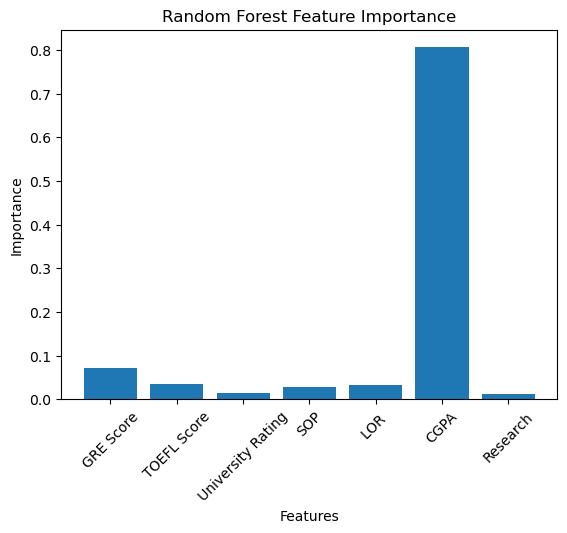

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/Gowthami/OneDrive/Desktop/archive/adm_data.csv')
data.drop(columns=['Serial No.'], inplace=True)
X = data.drop('Chance of Admit ', axis=1)
y = data['Chance of Admit ']

rf = RandomForestRegressor(n_estimators=100, random_state=42)

kf = KFold(n_splits=5, random_state=42, shuffle=True)
mse_values = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mse = np.mean((y_pred - y_test) ** 2)
    mse_values.append(mse)
    
print('Mean Square Error (MSE):', np.mean(mse_values))
print('Standard Deviation of MSE:', np.std(mse_values))
print('\n')

importances = rf.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance}')
plt.bar(X.columns, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45)
plt.show()
